In [3]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"

# normal stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib.patches as patches
from matplotlib import cm
import read_mist_models

# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 20


# Finally set up the plotting to look a little nicer.
plt.rcParams["savefig.dpi"] = 100
plt.rcParams["figure.dpi"] = 100

def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.998*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def logerr(t,dt):
    err1 = np.abs(np.log10((t-dt/2.0)/t))
    err2 = np.abs(np.log10((t+dt/2.0)/t))
    err = [[err1],[err2]]
    return err

BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)

DodgerBlue1 = (0.12, 0.56, 1.00)
DodgerBlue2 = (0.11, 0.53, 0.93)
DodgerBlue3 = (0.09, 0.45, 0.80)

COLORS=[ORANGE,SKY_BLUE,BLUE_GREEN,BLUE,RED_PURPLE,BLUE_GREEN,VERMILLION,DodgerBlue1,BLACK]

# Define HRD Location of ATHENA Models

StarDeepT=7130
StarDeepL=4.3e5
StarMidT=11684
StarMidL=1.256e6
StarTopT=47564
StarTopL=8.96e5
starhot = (4.223,5.841) 
starcool = (3.921,5.841)
LBVhot = (4.279,6.4) 
LBVcool = (3.954,6.2)
LBVhotl = (4.279,6.0)

# Define HRD Location of relevant Stars

sigmaori =(4.43,5.44)
kappaori =(4.42,5.35)
kcas = (4.33,5.52) # Crowther et al 2006, A&A 446, 279–293 (2006)
R71 = (4.19,5.78)

# DEFINES END OF MAIN SEQUENCE (Core X)

xend_ms = 1e-4

# HD LIMIT 

hdx=[4.447,3.8] # Humphrey-Davidson 1994
hdy=[6.4,5.83]

clr='BLACK' # 'palevioletred'


Reading in: ./data/04000M.track.eep
Reading in: ./data/06000M.track.eep
Reading in: ./data/12000M.track.eep


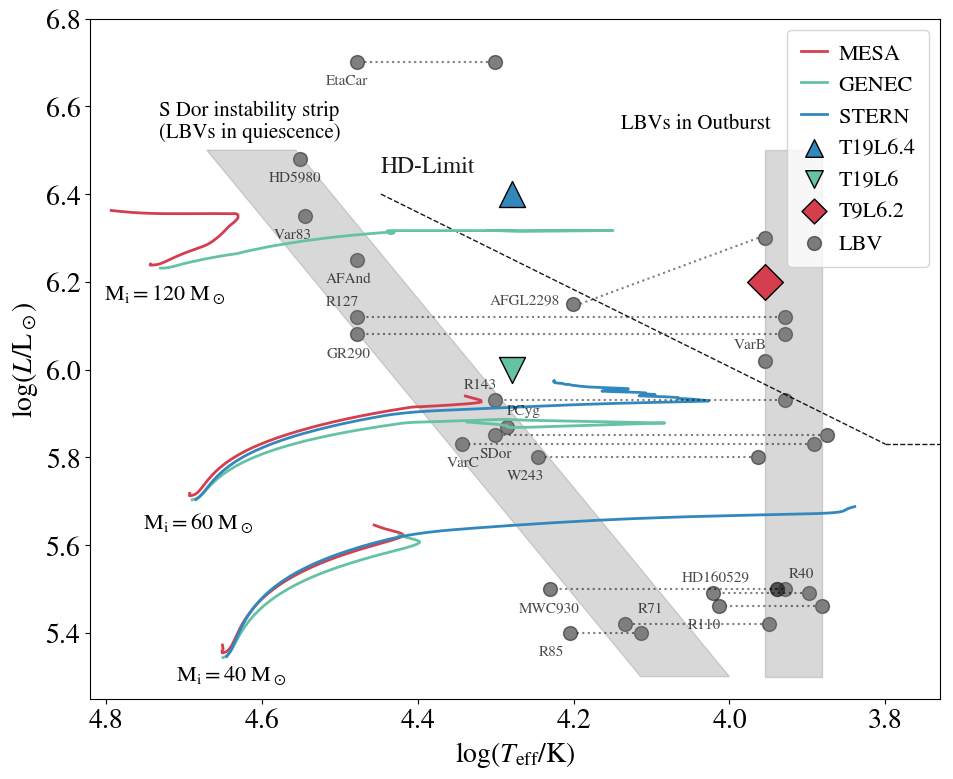

In [4]:
# SET PLOT SIZE, AXIS AND LIMITS

fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.12, 0.10, 0.85, 0.85])

plt.ylim([5.25,6.8])
plt.xlim([4.82,3.73])

# SYMBOL SIZE IN PLOT  
    
size = 300
size_lbv = 100
size_lbvc = 50

plt.plot(hdx, hdy, '--',linewidth=1.0,color=clr,alpha=0.9,zorder=2)
ax.annotate('HD-Limit',xy=(hdx[0]+0.0,hdy[0]+0.05),size=17,color=clr,alpha=0.9)
hdx=[3.8,3.58] #4.176
hdy=[5.83,5.83]
plt.plot(hdx, hdy, '--',linewidth=1.0,color=clr,alpha=0.9,zorder=1)

# Fill LBV instability strips
# Sdor-cool [7600,7600,9000,9000] [5.3,6.5,6.5,5.3]
# SDor-hot  [10000,36000,46800,13000] [5.3,6.5,6.5,5.3]

X_sdorcool = [9000,9000,7600,7600]
Y_sdorcool = [5.3,6.5,6.5,5.3]
X_sdorhot = [10000,36000,46800,13000]
Y_sdorhot = [5.3,6.5,6.5,5.3]

ax.fill(np.log10(X_sdorcool), Y_sdorcool,color='grey',alpha=0.3)
ax.fill(np.log10(X_sdorhot), Y_sdorhot,color='grey',alpha=0.3)

x = [40000,11000]
y = [6.5,5.2]
ax.annotate('S Dor instability strip',xy=(np.log10(x[0])+0.13,y[0]+0.08),alpha=1.0,size=15)
ax.annotate('(LBVs in quiescence)',xy=(np.log10(x[0])+0.13,y[0]+0.03),alpha=1.0,size=15)

x = [8500,8500]
y = [6.5,5.2]
ax.annotate('LBVs in Outburst',xy=(np.log10(x[0])+0.21,y[0]+0.05),alpha=1.0,size=15)


###################### ADDING MIST STELLAR EVOLUTIONARY TRACKS ############################
zamsL=[]
zamsT=[]

MIST='./data/'
MMIST=['04000','06000','12000']
ANNOTATE = ['40','60','120']

i=0
for mods in MMIST:
    eep = read_mist_models.EEP(MIST+mods+'M.track.eep')
    tms=eep.eeps['phase']>=0
    lms=eep.eeps['phase']>=0
    logTeffMS = eep.eeps[tms]['log_Teff']
    logLMS = eep.eeps[lms]['log_L']
    logTeff = eep.eeps['log_Teff']
    logL = eep.eeps['log_L']
    h1 = eep.eeps['center_h1']
    logLH = eep.eeps['log_LH']
    model = np.arange(1,len(h1))
    zams= find_zams(logL,logLH,model)
    end_ms = find_h1(h1,model,xend_ms)
    if (i==0):
        plt.plot(logTeff[zams:end_ms],logL[zams:end_ms],color="#d53e4f",linewidth=2,alpha=1.0,label='MESA')
    else:
        plt.plot(logTeff[zams:end_ms],logL[zams:end_ms],color="#d53e4f",linewidth=2,alpha=1.0)
    i=i+1
    zamsL.append(logL[zams])
    zamsT.append(logTeff[zams])
    
ii=0
for mass in ANNOTATE:
    ax.annotate('M$_{\mathrm{i}} = $'+mass+' M$_\odot$',xy=(zamsT[ii]+0.06,zamsL[ii]-0.08),fontsize=16)
    ii=ii+1
    
############ ADDING GENEVA MODELS ######################

GENEVA='./data/'
MODS=['M040Z14V0.dat','M060Z14V0.dat','M120Z14V0.dat']

# Reading the models. Names is basically the header content  
names=['line','time','mass','lgL','lgT','1H_surf','4He_surf','12C_surf','13C_surf','14N_surf','16O_surf','17O_surf','18O_surf','20Ne_surf','22Ne_surf','26Al_surf','Mcc/Mt','lg(Teff)','lg(Md)','lg(rhoc)','lg(Tc)','1H_cen','4He_cen','12C_cen','13C_cen','14N_cen','16O_cen','17O_cen','18O_cen','20Ne_cen','22Ne_cen','26Al_cen','Omeg_surf','Omeg_cen','Rp/Req','Md/Md(0)','v_crit1','v_crit2','v_equa','Om/Om_cr','Gamma_Ed','lg(Mdot_mech)','L_tot']    
i=0
for MODEL in MODS:
    eeps = np.genfromtxt(GENEVA+MODEL,skip_header=2,names=names)
    lgL = eeps['lgL']
    lgT = eeps['lgT']
    model = eeps['line']
    h1 = eeps['1H_cen']
    end_ms = find_h1(h1,model,xend_ms)
    if (i==0):
        plt.plot(lgT[:end_ms],lgL[:end_ms],color="#66c2a5",linewidth=2,alpha=1.0,label='GENEC')
    else:
        plt.plot(lgT[:end_ms],lgL[:end_ms],color="#66c2a5",linewidth=2,alpha=1.0)
    i=i+1
    #plt.plot(lgT[end_ms:],lgL[end_ms:],color='BLUE',linewidth=2,alpha=0.4,linestyle=':')

############ ADDING STERN MODELS ######################

BROTT='./data/'
MODS=['J_A+A_530_A115_evol_f40-0.mw.track.dat.txt','J_A+A_530_A115_evol_f60-0.mw.track.dat.txt']
#MODS=['J_A+A_530_A115_evol_f60-0.mw.track.dat.txt']
i=0
NAMES=['t','Mass','Teff','logL','R','log(Mdot)', 'logg'  ,'Vsurf'  ,'Prot'  ,'Vcrit'  ,'Ge'  ,'eps(H)' ,'eps(He)' ,'eps(Li)' ,'eps(Be)'  ,'eps(B)'  ,'eps(C)'  ,'eps(N)'  ,'eps(O)'  ,'eps(F)' ,'eps(Ne)' ,'eps(Na)' ,'eps(Mg)' ,'eps(Al)' ,'eps(Si)' ,'eps(Fe)'  ,'sH1' ,'sHe3' ,'sHe4' ,'sLi7' ,'sBe9' ,'sB10' ,'sB11' ,'sC12' ,'sC13' ,'sN14' ,'sN15' ,'sO16' ,'sO17' ,'sO18' ,'sF19'  ,'sNe20'  ,'sNe21'  ,'sNe22'  ,'sNa23'  ,'sMg24'  ,'sMg25'  ,'sMg26'  ,'sAl26'  ,'sAl27'  ,'sSi28' , 'sSi29' , 'sSi30' , 'sFe56' , 'cH1' ,'cHe3' ,'cHe4' ,'cLi7' ,'cBe9' ,'cB10' ,'cB11' ,'cC12' ,'cC13' ,'cN14' ,'cN15' ,'cO16' ,'cO17' ,'cO18' ,'cF19'  ,'cNe20'  ,'cNe21'  ,'cNe22'  ,'cNa23'  ,'cMg24'  ,'cMg25'  ,'cMg26'  ,'cAl26'  ,'cAl27'  ,'cSi28' ,'cSi29'  ,'cSi30' ,'cFe56']
for MODEL in MODS:
    eeps = np.genfromtxt(BROTT+MODEL,skip_header=5,skip_footer=1,names=NAMES,delimiter="|")
    lgL = eeps['logL']
    lgT = np.log10(eeps['Teff'])
    model = np.arange(1,len(lgL))
    h1 = eeps['cH1']
    end_ms = find_h1(h1,model,xend_ms)
    if (i==0):
        plt.plot(lgT[:end_ms],lgL[:end_ms],color="#3288bd",linewidth=2,alpha=1.0,label='STERN')
    else:
        plt.plot(lgT[:end_ms],lgL[:end_ms],color="#3288bd",linewidth=2,alpha=1.0)
    i=i+1
    #plt.plot(lgT[end_ms:],lgL[end_ms:],color='GREEN',linewidth=2,alpha=0.4,linestyle=':')
    
# ADD LOCATION ATHENA MODELS 

LBV1=r'T19L6.4'
LBV2=r'T19L6'
LBV3=r'T9L6.2'

plt.scatter(LBVhot[0],LBVhot[1],color="#3288bd",s=size+50,marker='^',label=LBV1,zorder=2,edgecolors='BLACK')
plt.scatter(LBVhotl[0],LBVhotl[1],color="#66c2a5",s=size+50,marker='v',label=LBV2,zorder=2,edgecolors='BLACK')
plt.scatter(LBVcool[0],LBVcool[1],color="#d53e4f",s=size+30,marker='D',label=LBV3,zorder=2,edgecolors='BLACK')



# ADD OBSERVATIONAL DATA
LBV=(('EtaCar',[30000,20000],[6.7,6.7]),
     #('AGCar-2kpc',[22800,8500],[6.18-0.95,6.0-0.95]), # Remove LBV with uncertain distance (Smith & Stassun 2017)
     # ('HRCar-2.3kpc',[17900,10000],[5.68-0.67,5.68-0.67]), # Remove LBV with uncertain distance (Smith & Stassun 2017)
     ('R110',[10300,7600],[5.46,5.46]),
     ('W243',[17600,9200],[5.8,5.8]),
     ('MWC930',[17000,8500],[5.5,5.5]),
     ('R85',[16000,13000],[5.4,5.4]),
     ('GR290',[30000,8500],[6.08,6.08]))

LBV_hot = (('HD5980',35500,6.48),
           ('Var83',35000,6.35),
           ('AFAnd',30000,6.25))

# These need some manual adjustment to place label on plot
# TOP
LBV_label=(('R127',[30000,8500],[6.12,6.12]),
           #('HRCar',[17900,10000],[5.55,5.55]), # Remove LBV with uncertain distance (Smith & Stassun 2017)
           ('HD160529',[10500,7900],[5.49,5.49]),
           ('R143',[20000,8500],[5.93,5.93]))
           # ('AGCar',[22800,8500],[6.18,6.0]), # Remove LBV with uncertain distance (Smith & Stassun 2017)
#RIGHT
LBV_label_r = (('R40',[8700,8700],[5.5,5.5]),
           ('R71',[13600,8900],[5.42,5.42]))           
    
LBV2=(('HD168607-2.2kpc',10500,5.4),
      ('HD168607-1.2kpc',10500,5.4-0.52),
      ('AEAnd',21000,5.85),
      ('AFAnd',30000,6.25),
      ('Var83',35000,6.35),
      ('HD5980',35500,6.48)) 


LBV2_label = (('VarB',9000,6.02),
              ('PCyg',19300,5.87))

# LBV candidates
LBVC=(('HD168625',13500,5.37),
      ('S61',35500,6.09),      
      ('Sk-69279',30300,5.8),
      ('S119',28500,5.78),
      ('Wra751',30000,5.77),
      ('Hen3519-8kpc',27500,5.82),
      ('Wray17-96',13000,6.26),
      ('G24.73+0.69',12000,5.6),
      ('G26.47+0.02',17000,6.0),
      ('G79.29+0.46',25000,6.1),
      ('Hen3519-2kpc',27500,5.82-1.2))


# LBVC New Distances

deltax=0.04
deltay=0.05
delta=0.009
for i in range(0, len(LBV)): 
    if i==0:
        plt.scatter(np.log10(LBV[i][1][0]),LBV[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5,label='LBV')
        plt.scatter(np.log10(LBV[i][1][1]),LBV[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV[i][0],xy=(np.log10(LBV[i][1][0])+deltax,LBV[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(LBV[i][1][1])+delta,np.log10(LBV[i][1][0])-delta),(LBV[i][2][1],LBV[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)
    else:    
        plt.scatter(np.log10(LBV[i][1][0]),LBV[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        plt.scatter(np.log10(LBV[i][1][1]),LBV[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV[i][0],xy=(np.log10(LBV[i][1][0])+deltax,LBV[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(LBV[i][1][1])+delta,np.log10(LBV[i][1][0])-delta),(LBV[i][2][1],LBV[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)
 
VARCSDOR=(('VarC',[22000,7800],[5.83,5.83]),
     ('SDor',[20000,7500],[5.85,5.85]))

for i in range(0, len(VARCSDOR)): 
        plt.scatter(np.log10(VARCSDOR[i][1][0]),VARCSDOR[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        plt.scatter(np.log10(VARCSDOR[i][1][1]),VARCSDOR[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(VARCSDOR[i][0],xy=(np.log10(VARCSDOR[i][1][0])+deltax/2,VARCSDOR[i][2][0]-deltay),alpha=0.7,size=11)
        plt.plot((np.log10(VARCSDOR[i][1][1])+delta,np.log10(VARCSDOR[i][1][0])-delta),(VARCSDOR[i][2][1],VARCSDOR[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)  
   
AFGL2298 = ('AFGL2298',[15850,9000],[6.15,6.3])
plt.scatter(np.log10(AFGL2298[1][0]),AFGL2298[2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
plt.scatter(np.log10(AFGL2298[1][1]),AFGL2298[2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
ax.annotate(AFGL2298[0],xy=(np.log10(AFGL2298[1][0])+2.7*deltax,AFGL2298[2][0]),alpha=0.7,size=11)
plt.plot((np.log10(AFGL2298[1][1])+delta,np.log10(AFGL2298[1][0])-delta),(AFGL2298[2][1],AFGL2298[2][0]),color='BLACK',linestyle=':',alpha=0.5)  
   
# PLOT LBV hot
for i in range(0, len(LBV_hot)): 
        plt.scatter(np.log10(LBV_hot[i][1]),LBV_hot[i][2],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV_hot[i][0],xy=(np.log10(LBV_hot[i][1])+deltax,LBV_hot[i][2]-deltay),alpha=0.7,size=11)

# PLOT LBV CANDIDATES
  
deltax=0.04
deltay=0.028
delta=0.009

for i in range(0, len(LBV_label)): 
    plt.scatter(np.log10(LBV_label[i][1][0]),LBV_label[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
    plt.scatter(np.log10(LBV_label[i][1][1]),LBV_label[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
    ax.annotate(LBV_label[i][0],xy=(np.log10(LBV_label[i][1][0])+deltax,LBV_label[i][2][0]+deltay),alpha=0.7,size=11)
    plt.plot((np.log10(LBV_label[i][1][1])+delta,np.log10(LBV_label[i][1][0])-delta),(LBV_label[i][2][1],LBV_label[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)   

for i in range(0, len(LBV_label_r)): 
    plt.scatter(np.log10(LBV_label_r[i][1][0]),LBV_label_r[i][2][0],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
    plt.scatter(np.log10(LBV_label_r[i][1][1]),LBV_label_r[i][2][1],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
    ax.annotate(LBV_label_r[i][0],xy=(np.log10(LBV_label_r[i][1][0])-deltax/2.5,LBV_label_r[i][2][0]+deltay),alpha=0.7,size=11)
    plt.plot((np.log10(LBV_label_r[i][1][1])+delta,np.log10(LBV_label_r[i][1][0])-delta),(LBV_label_r[i][2][1],LBV_label_r[i][2][0]),color='BLACK',linestyle=':',alpha=0.5)   
    
    
for i in range(0, len(LBV2_label)): 
    if i==0:
        plt.scatter(np.log10(LBV2_label[i][1]),LBV2_label[i][2],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV2_label[i][0],xy=(np.log10(LBV2_label[i][1])+deltax,LBV2_label[i][2]+deltay),alpha=0.7,size=11)
    else: #PCYG
        plt.scatter(np.log10(LBV2_label[i][1]),LBV2_label[i][2],color='BLACK',s=size_lbv,marker='o',alpha=0.5)
        ax.annotate(LBV2_label[i][0],xy=(np.log10(LBV2_label[i][1]),LBV2_label[i][2]+deltay),alpha=0.7,size=11)
        
ax.set_xlabel(r'$\log \left( T_{\rm eff} / {\rm K} \right)$')
ax.set_ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')


label=plt.legend(loc=1,fontsize=16,scatterpoints=1,labelspacing=0.5,handletextpad=0.5,handlelength=1.2,frameon=True,borderpad=0.6)

label.legendHandles[3]._sizes = [160]
label.legendHandles[4]._sizes = [160]
label.legendHandles[5]._sizes = [160]

FILENAME = "LBV_plot_final.pdf"
plt.savefig(FILENAME)

